# 📊 HDF5 Data Processing with Python and ChatGPT

Welcome to **HDF5 Data Processing**! In this session, we will use **ChatGPT**, **HDF5**, and **Python** to efficiently store, manipulate, and analyze large datasets.

### Enable the Table of Contents Sidebar in Jupyter Notebook  
For easier navigation:

1. Click on **View** in Jupyter Notebook.
2. Select **Left Sidebar** click **Show Table of Contents**.

## 📌 What You Will Learn
1. Set up your computer for **Python scripting** and **HDF5 file processing**.
2. Use **ChatGPT** to generate and debug **HDF5 queries**.
3. Learn best practices for **efficient data management** with HDF5.
4. Process and analyze **HDF5 datasets** using **Python and Numpy**.

## 🛠️ Required Programs
- **Python** (Version 3.12 or later)
- **HDF5 View** (Library for hierarchical data storage)
- **h5py** (Python library for working with HDF5 files)
- **Numpy** (For reading and analyzing HDF5 data)

---

## ▶️ Run the Test Cell  
Before we begin, run the test cell below to check your setup.

This test will:
- ✅ Verify that **HDF5 (h5py)** is available.
- ✅ Check if **Pandas** is installed.
- ✅ Confirm that an **HDF5 file can be created and accessed**.




In [1]:
# Checking HDF5 and Pandas Setup

print("🔍 Checking system setup...\n")

# Test h5py (HDF5 support)
try:
    import h5py
    with h5py.File("test.hdf5", "w") as f:
        f.create_dataset("test_data", data=[1, 2, 3, 4, 5])
    print("✅ HDF5 (h5py) is available and working!")
except Exception as e:
    print(f"❌ HDF5 test failed: {e}")

# Test Pandas
try:
    import pandas as pd
    print("✅ Pandas imported successfully!")
except ImportError:
    print("❌ Pandas is not installed. Run `pip install pandas`.")

# Confirm Python version
import sys
print(f"🐍 Python version: {sys.version.split()[0]}")

print("\n✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.")


🔍 Checking system setup...

✅ HDF5 (h5py) is available and working!
✅ Pandas imported successfully!
🐍 Python version: 3.12.9

✅ Test complete! If you see any ❌ marks, install missing dependencies before proceeding.


<h1 style="color:blue;">📊 HDF5 Data Structure</h1>

## Purpose

Use ChatGPT to help you understand and analyze HDF5 data. Before performing any analysis, it's important to understand the file structure so you can ask ChatGPT the right questions for tasks like calculating shear stress.

## Key Components of the HDF5 File
- **Depth Data**: Stored in `TIMDEP NETCDF OUTPUT RESULTS/FLOW DEPTH/Values`, containing depth values for each grid element over time.
- **Velocity Data**: Located in `TIMDEP NETCDF OUTPUT RESULTS/Velocity MAG/Values`, holding velocity data for each grid element.
- **Time Intervals**: Found in `TIMDEP NETCDF OUTPUT RESULTS/FLOW DEPTH/Times`, representing the time steps for the depth and velocity data.
- **Grid Elements**: Organized by columns for each grid element in fplain.dat and cadpts.dat, with rows representing different time steps.

## Instructions
1. Ask ChatGPT to write a script that can print the structure of an hdf5 file.
2. Remember to add important details like the name and path of the file.


In [18]:
import h5py

def print_structure(hdf5_file):
    with h5py.File(hdf5_file, 'r') as file:
        print(f"Structure of {hdf5_file}:")
        file.visititems(print_name_and_shape)

def print_name_and_shape(name, obj):
    if isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name} - Shape: {obj.shape}, Dtype: {obj.dtype}")
    elif isinstance(obj, h5py.Group):
        print(f"Group: {name}")

# File paths
#file_path_1 = r"C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEP.HDF5"
file_path_2 = r"C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5"

# Print the structure of both files
#print_structure(file_path_1)
print_structure(file_path_2)


Structure of C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5:
Dataset: File Type - Shape: (1,), Dtype: |S5
Dataset: File Version - Shape: (1,), Dtype: float32
Group: TIMDEP OUTPUT RESULTS
Group: TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET
Dataset: TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Maxs - Shape: (200,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Mins - Shape: (200,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Times - Shape: (200,), Dtype: float64
Dataset: TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Values - Shape: (200, 8588), Dtype: float32
Group: TIMDEP OUTPUT RESULTS/FLOW DEPTH
Dataset: TIMDEP OUTPUT RESULTS/FLOW DEPTH/Maxs - Shape: (200,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/FLOW DEPTH/Mins - Shape: (200,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times - Shape: (200,), Dtype: float64
Dataset: TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values - Shape: (200, 8588), Dtype: float32
Dataset: TIMDEP OUTPUT RE

In [4]:
import h5py

def list_hdf5_structure(file_path):
    with h5py.File(file_path, 'r') as file:
        def print_structure(name, obj):
            print(name)
            for key, val in obj.attrs.items():
                print(f"  Attribute: {key}: {val}")

        file.visititems(print_structure)

# Specify the path to your HDF5 file
file_path = r"C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5"

# List the structure of the HDF5 file
list_hdf5_structure(file_path)

File Type
File Version
TIMDEP OUTPUT RESULTS
  Attribute: Grouptype: [b'Generic']
TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET
  Attribute: Data Type: [0]
  Attribute: DatasetCompression: [9]
  Attribute: DatasetUnits: [b'ft or m']
  Attribute: Grouptype: [b'DATASET SCALAR']
  Attribute: TimeUnits: [b'Hours']
TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Maxs
TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Mins
TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Times
TIMDEP OUTPUT RESULTS/CUMULATIVE FLOW QNET/Values
TIMDEP OUTPUT RESULTS/FLOW DEPTH
  Attribute: Data Type: [0]
  Attribute: DatasetCompression: [9]
  Attribute: DatasetUnits: [b'ft or m']
  Attribute: Grouptype: [b'DATASET SCALAR']
  Attribute: TimeUnits: [b'Hours']
TIMDEP OUTPUT RESULTS/FLOW DEPTH/Maxs
TIMDEP OUTPUT RESULTS/FLOW DEPTH/Mins
TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times
TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values
TIMDEP OUTPUT RESULTS/FLOW DEPTH/time_to_1_ft
TIMDEP OUTPUT RESULTS/MAX Q RES DIRECTION
  Attribute: Data Type: [0]
  Attrib

In [11]:
import h5py

def remove_selected_datasets(file_path):
    with h5py.File(file_path, 'a') as file:  # Open the file in append mode to allow modifications
        # List of datasets to remove
        datasets_to_remove = [
            "TIMDEP NETCDF OUTPUT RESULTS/dep_x_vel",
            "TIMDEP NETCDF OUTPUT RESULTS/dep_x_vel_x_vel"
        ]

        # Remove datasets
        for dataset in datasets_to_remove:
            if dataset in file:
                del file[dataset]
                print(f"Removed dataset: {dataset}")
            else:
                print(f"Dataset not found: {dataset}")

# Specify the path to your HDF5 file
file_path = r'C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEP.HDF5'

# Remove the specified datasets from the HDF5 file
remove_selected_datasets(file_path)


Removed dataset: TIMDEP NETCDF OUTPUT RESULTS/dep_x_vel
Removed dataset: TIMDEP NETCDF OUTPUT RESULTS/dep_x_vel_x_vel


# 📊 HDF5 Depth * Velocity

## Purpose
This script uses depth and velocity data from an HDF5 file to create a new table called `DepXVel` and fill that table with the depth * velocity over time data.

### Examples of Operations:
- **Read depth and velocity data from HDF5**: This data is used to calculate depth * velocity.
- **Create a new table**: The results are saved back into the file for further analysis.

## Instructions
1. **HDF5 read tables**: Ask ChatGPT for a script to read depth, velocity, and calculate a depth * velocity table.
2. **Clarify the Query**: Feed the appropriate structure of the HDF5 file.
3. **Save the results**: Ask ChatGPT to update the script by writing the results to a new table called `DepXVel` in the file.


## Example ChatGPT Query

- **Objective**: Create a Python script to manipulate HDF5 file data.
- **File Path**: `C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5`
- **Data Tasks**:
  - **Add Table `dep_x_vel`**: Multiply depth and velocity data.
  - **Add Table `dep_x_sqvel`**: Multiply depth by velocity squared.
- **Groups and Datasets**:
  - **Group `TIMDEP OUTPUT RESULTS/FLOW DEPTH`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
  - **Group `TIMDEP OUTPUT RESULTS/MAX VEL`**:
    - **Dataset**: `Maxs` - Shape: (200,), Dtype: float32
    - **Dataset**: `Mins` - Shape: (200,), Dtype: float32
    - **Dataset**: `Times` - Shape: (200,), Dtype: float64
    - **Dataset**: `Values` - Shape: (200, 8588), Dtype: float32
- **Operations**:
  - **Delete Existing Datasets**: Check and delete existing datasets `dep_x_vel` and `dep_x_sqvel` if present.
  - **Calculate and Store New Data**: Compute and store new datasets for `dep_x_vel` and `dep_x_sqvel`.
- **Dependencies**: Utilize `h5py` for HDF5 interaction and `numpy` for mathematical operations.
- **Request**: Provide a Python script that executes the above operations as described.


In [17]:
import h5py
import numpy as np

# File path
file_path = r"C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5"

# Open the HDF5 file
with h5py.File(file_path, 'a') as hdf:
    # Access the depth and velocity datasets
    depth_values = hdf['TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values'][:]
    velocity_values = hdf['TIMDEP OUTPUT RESULTS/MAX VEL/Values'][:]

    # Calculate depth * velocity
    dep_x_vel = np.multiply(depth_values, velocity_values)
    
    # Calculate depth * velocity^2
    dep_x_sqvel = np.multiply(depth_values, np.square(velocity_values))
    
    # Check and delete the old 'dep_x_vel' dataset if it exists
    if 'dep_x_vel' in hdf['TIMDEP OUTPUT RESULTS']:
        del hdf['TIMDEP OUTPUT RESULTS/dep_x_vel']
    
    # Create a new dataset for dep_x_vel
    hdf.create_dataset('TIMDEP OUTPUT RESULTS/dep_x_vel', data=dep_x_vel, dtype='float32')
    
    # Check and delete the old 'dep_x_sqvel' dataset if it exists
    if 'dep_x_sqvel' in hdf['TIMDEP OUTPUT RESULTS']:
        del hdf['TIMDEP OUTPUT RESULTS/dep_x_sqvel']
    
    # Create a new dataset for dep_x_sqvel
    hdf.create_dataset('TIMDEP OUTPUT RESULTS/dep_x_sqvel', data=dep_x_sqvel, dtype='float32')

    print("Updated HDF5 file with new datasets after removing old ones.")


Updated HDF5 file with new datasets after removing old ones.


In [29]:
import h5py
import numpy as np

def add_floodwave_arrival_table(file_path):
    with h5py.File(file_path, 'a') as file:
        # Access the existing depth and time data from the specified group and tables
        depth_data = file['TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values'][:]
        time_data = file['TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times'][:]

        # Initialize an array to store the time of first exceedance for each grid
        time_to_1_ft = np.full((depth_data.shape[1],), np.nan)  # Use nan to indicate no exceedance
        
        # Depth threshold for floodwave arrival
        depth_threshold = 1.0  # 1 foot

        # Find the time at which each column (grid element) first exceeds the depth threshold
        for i in range(depth_data.shape[1]):  # iterate over each column (grid element)
            exceedance_index = np.where(depth_data[:, i] >= depth_threshold)[0]
            if exceedance_index.size > 0:
                time_to_1_ft[i] = time_data[exceedance_index[0]]  # get the first time where depth exceeds

        # Create or update the 'time_to_1_ft' dataset in the HDF5 file
        if 'TIMDEP OUTPUT RESULTS/time_to_1_ft' in file:
            del file['TIMDEP OUTPUT RESULTS/time_to_1_ft']  # remove existing dataset if it exists
        file.create_dataset('TIMDEP OUTPUT RESULTS/time_to_1_ft', data=time_to_1_ft)

        print("Dataset 'time_to_1_ft' has been created/updated.")

# Specify the path to your HDF5 file
file_path = r'C:\Projects\LifeSim\FLO-2D LifeSim Test\ProTest\TIMDEPNC.HDF5'

# Run the function to add the floodwave arrival time dataset
add_floodwave_arrival_table(file_path)


Dataset 'time_to_1_ft' has been created/updated.


<h1 style="color:blue;">📊 HDF5 Time to 1 ft or m</h1>

## Purpose
Create a script to analyse an hdf5 file for the time to 1ft values and build them into a new table for the purpose of rasterizing the data.

## Examples of Operations:
- **Read HDF5 data**: The script accesses `depth values` data stored in the HDF5 file.
- **Finds 1 ft**: Builds a new table with time that cell reaches 1ft. 
- **Data outup**: Writes the data to a file called time_to_1_ft.csv.

## Instructions
1. Ask ChatGPT to read the `hdf5` data and create a new table.
2. Remember that the data is organized by column and row, where column 0 corresponds to grid element 1 and row 0 corresponds to time interval 1.
3. Remember to tell ChatGPT the name and path of your file.

## Example ChatGPT Query

- **Objective**: Build a Python script to create a table that tracks the floodwave arrival time for each grid element to reach a depth of 1 foot.
- **Data**:
  - **Group**: `TIMDEP OUTPUT RESULTS/FLOW DEPTH`
  - **Time Data**: Stored in a dataset named `Times`, structures as a single col of hours over intervals of 0.05 hours for a total of 10 hours.
  - **Depth Data**: Stored in a dataset named `Values`, structured as rows as time intervals and columns as grid elements (1 to 8588), representing water depth in feet.
- **New Table**: Create a dataset named `time_to_1_ft` within the same group to store the calculated time to reach 1 foot for each grid element.
- **Conditions**: Not all grid elements will reach a depth of 1 foot. For those that do not, the time should be recorded as `0.0`.
- **Dependencies**: Utilize the `h5py` library for HDF5 interaction.
- **File Path**: `C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5`
- **Request**: Can you provide a Python script to perform the calculations and update the HDF5 file as described?

## 🔽 Code Block
The following code block is the result of this query. The bold text is not necessary in your queries.

In [8]:
import h5py
import numpy as np

# Define the file path
file_path = r'C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5'

# Open the HDF5 file
with h5py.File(file_path, 'a') as f:
    # Access the group and datasets
    group = f['TIMDEP OUTPUT RESULTS/FLOW DEPTH']
    times = group['Times'][:]
    values = group['Values'][:]

    # Convert the values dataset to a NumPy array explicitly
    depth_values = np.array(values)

    # Vectorized approach to find the first time each grid reaches 1 foot of depth
    # Mask of depths reaching or exceeding 1 foot
    depth_mask = depth_values >= 1.0

    # Use argmax to find the first true value in each column; if no true value, argmax returns 0
    first_reach_indices = np.argmax(depth_mask, axis=0)

    # Correct indices where no value reaches 1 foot (all False along the column)
    no_reach_mask = ~depth_mask.any(axis=0)
    first_reach_indices[no_reach_mask] = -1  # Set to -1 where no depth reaches 1 foot

    # Create an array for time to reach 1 foot
    time_to_1_ft = np.zeros(depth_values.shape[1], dtype=float)
    time_to_1_ft[first_reach_indices != -1] = times[first_reach_indices[first_reach_indices != -1]]
    time_to_1_ft[no_reach_mask] = 0.0  # Set time to 0.0 where no depth reaches 1 foot

    # Create or update the dataset
    if 'time_to_1_ft' in group:
        del group['time_to_1_ft']
    group.create_dataset('time_to_1_ft', data=time_to_1_ft)

print("The dataset 'time_to_1_ft' has been updated with the arrival times.")


The dataset 'time_to_1_ft' has been updated with the arrival times.


<h1 style="color:blue;">📊 HDF5 Write Table to File</h1>

## Purpose
Create a script to analyse an hdf5 file for the time to 1ft values and build them into a new table for the purpose of rasterizing the data.

## Examples of Operations:
- **Read HDF5 data**: The script accesses `time_to_1_ft` data stored in the HDF5 file.
- **Finds X Y**: Finds X and Y centroid coordinate from the hdf5 data. 
- **Data output**: Writes the data to a file called time_to_1_ft.csv in a format that FLO-2D Rasterizor can read.

## Instructions
1. Ask ChatGPT to read the `hdf5` data and create Join the data.
2. Remember that the data is organized by column and row, where column 0 corresponds to grid element 1 and row 0 corresponds to time interval 1.
3. The X and Y data is in a 1D col table.
4. Output the data as GE X Y VAL space delimited.
5. Remember to tell ChatGPT the name and path of your file.

## Example ChatGPT Query

- **Objective**: Create a Python script to export data from an HDF5 file to a text file.
- **Data**: The script should export the grid element number (GE), X and Y coordinates (centroids), and the time to reach 1 foot of flow depth (VAL).
- **Structure**: Ensure the data is organized by grid element number, with columns corresponding to GE, X, Y, and VAL. GE should start at 1 for the first grid element.
- **Output Format**: Save the output in a text file named `time_to_1_ft.out` as space-delimited data.
- **Dependencies**: Use `h5py` and `numpy` for handling the HDF5 file and numerical operations.
- **File Paths**: Include variables to set file paths for reading the input and writing the output.
- **Path**: `C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5`
- **Request**: Can you provide a Python script to export the data to the specified output file using the details provided?

### Data Structure

```
Group: TIMDEP OUTPUT RESULTS/FLOW DEPTH
Dataset: TIMDEP OUTPUT RESULTS/FLOW DEPTH/Maxs - Shape: (200,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/FLOW DEPTH/Mins - Shape: (200,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times - Shape: (200,), Dtype: float64
Dataset: TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values - Shape: (200, 8588), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/FLOW DEPTH/time_to_1_ft - Shape: (8588,), Dtype: float64

Group: TIMDEP OUTPUT RESULTS/X-Coordinate
Dataset: TIMDEP OUTPUT RESULTS/X-Coordinate/Maxs - Shape: (1,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/X-Coordinate/Mins - Shape: (1,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/X-Coordinate/Times - Shape: (1,), Dtype: float64
Dataset: TIMDEP OUTPUT RESULTS/X-Coordinate/Values - Shape: (1, 8588), Dtype: float32

Group: TIMDEP OUTPUT RESULTS/Y-Coordinate
Dataset: TIMDEP OUTPUT RESULTS/Y-Coordinate/Maxs - Shape: (1,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/Y-Coordinate/Mins - Shape: (1,), Dtype: float32
Dataset: TIMDEP OUTPUT RESULTS/Y-Coordinate/Times - Shape: (1,), Dtype: float64
Dataset: TIMDEP OUTPUT RESULTS/Y-Coordinate/Values - Shape: (1, 8588), Dtype: float32
```

## 🔽 Code Block

Here is the Python script to perform the data export:

In [16]:
import h5py
import numpy as np

# Define the path to the HDF5 file
hdf5_file_path = r'C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5'
output_file_path = r'C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\time_to_1_ft.out'

# Open the HDF5 file
with h5py.File(hdf5_file_path, 'r') as file:
    # Load the necessary datasets
    x_coords = file['TIMDEP OUTPUT RESULTS/X-Coordinate/Values'][0]
    y_coords = file['TIMDEP OUTPUT RESULTS/Y-Coordinate/Values'][0]
    time_to_1_ft = file['TIMDEP OUTPUT RESULTS/FLOW DEPTH/time_to_1_ft'][:]
    
    # Prepare the data for output
    grid_elements = np.arange(1, len(time_to_1_ft) + 1)
    data = np.column_stack((grid_elements, x_coords, y_coords, time_to_1_ft))
    
    # Save the data to a text file
    np.savetxt(output_file_path, data, fmt='%d %.6f %.6f %.6f', delimiter=' ', header='GE X Y VAL', comments='')

print(f'Data successfully exported to {output_file_path}')


Data successfully exported to C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\time_to_1_ft.out


<h1 style="color:blue;">📊 HDF5 Plot Data</h1>

## Purpose
This script reads `DepXVel` data from an HDF5 file and plots it over time for a specific grid element. The plot helps visualize how shear stress (or depth * velocity) changes throughout the simulation.

## Examples of Operations:
- **Read HDF5 data**: The script accesses `DepXVel` data stored in the HDF5 file.
- **Plot data over time**: It generates a time series plot for a specific grid element.
- **Select the grid element**: You can specify the grid element (column) for which you want to plot the depth * velocity.

## Instructions
1. Ask ChatGPT to read the `DepXVel` data and plot it for a specific grid element number.
2. Remember that the data is organized by column and row, where column 0 corresponds to grid element 1.
3. Ask ChatGPT to let you input the grid element number you want to plot.
4. Remember to tell ChatGPT the name and path of your file.


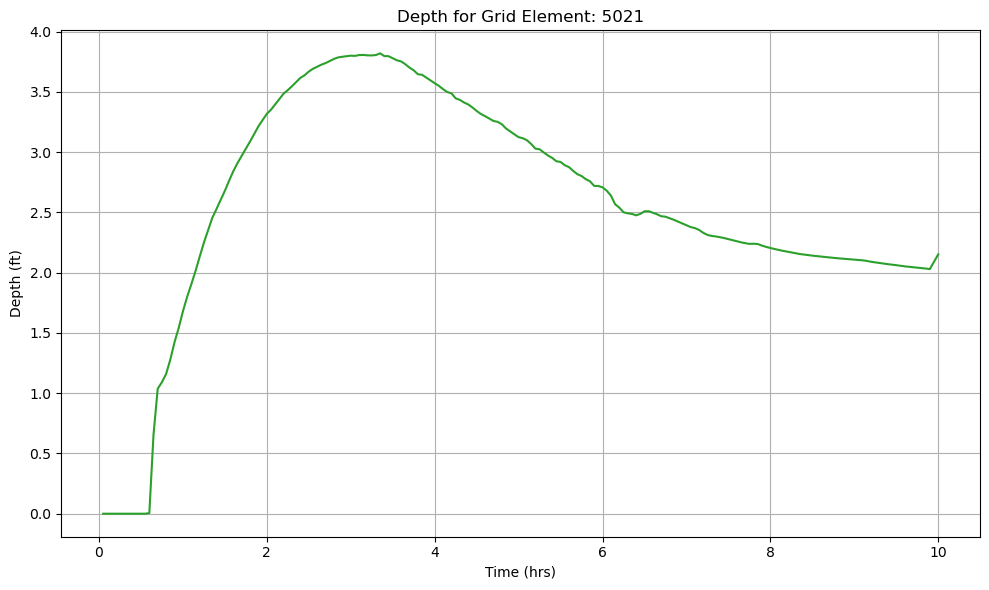

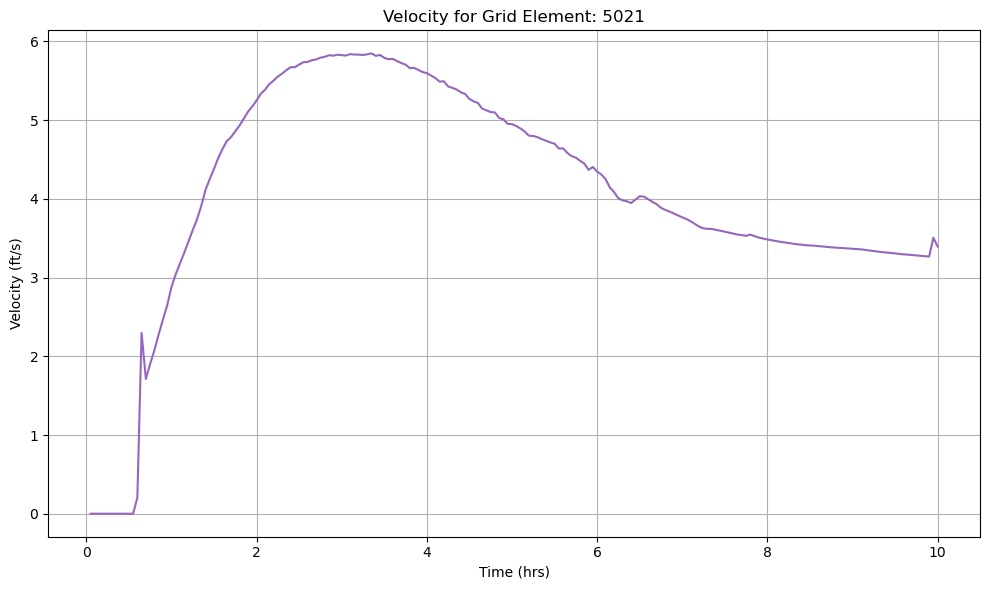

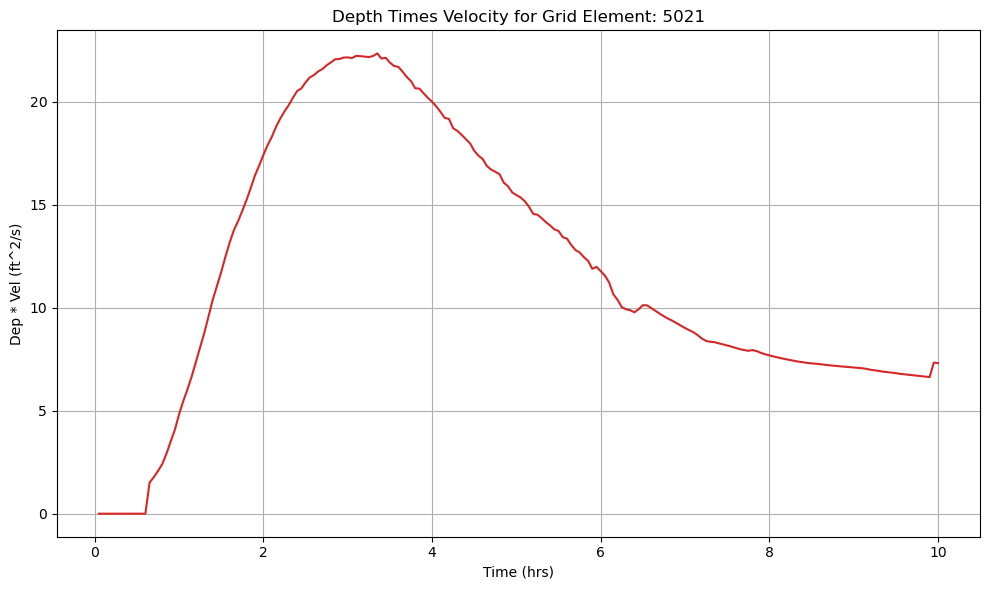

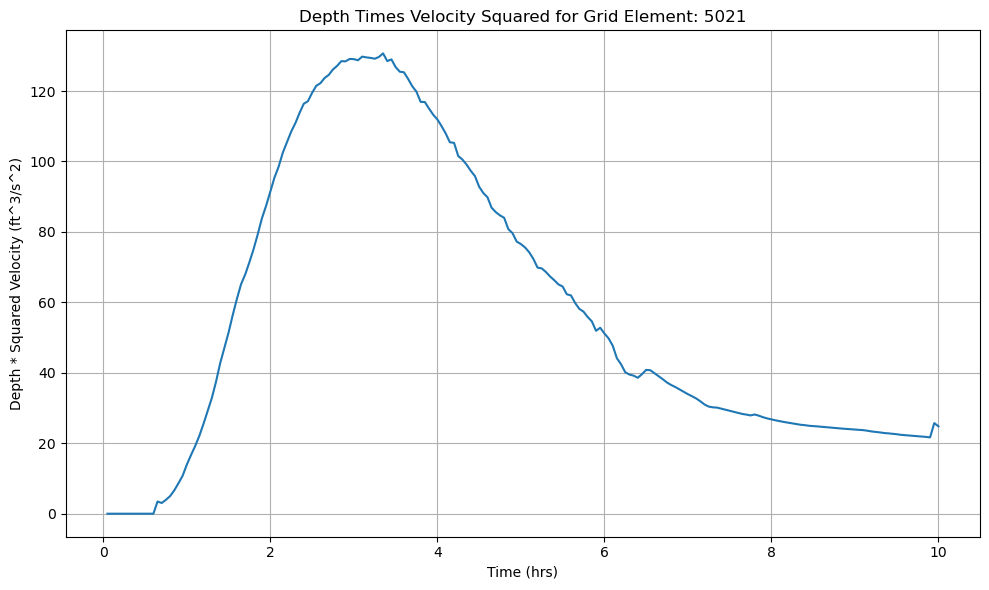

In [26]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

def plot_individual_data(hdf5_path, grid_element):
    # Open the HDF5 file
    with h5py.File(hdf5_path, 'r') as file:
        # Access the Times dataset to get the time steps
        times = file['TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times'][:]
        
        # Adjust grid_element index for 0-based indexing in Python (HDF5 data is 1-based)
        index = grid_element - 1

        # Access the Values dataset for depth
        depth_values = file['TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values'][:, index]

        # Access the velocity and squared velocity datasets
        dep_x_vel = file['TIMDEP OUTPUT RESULTS/dep_x_vel'][:, index]
        dep_x_sqvel = file['TIMDEP OUTPUT RESULTS/dep_x_sqvel'][:, index]
        
        # Access the maximum velocity dataset
        max_vel_values = file['TIMDEP OUTPUT RESULTS/MAX VEL/Values'][:, index]

        # Plot Depth
        plt.figure(figsize=(10, 6))
        plt.plot(times, depth_values, label='Depth (ft)', color='tab:green')
        plt.xlabel('Time (hrs)')
        plt.ylabel('Depth (ft)')
        plt.title(f'Depth for Grid Element: {grid_element}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot Velocity
        plt.figure(figsize=(10, 6))
        plt.plot(times, max_vel_values, label='Maximum Velocity (ft/s)', color='tab:purple')
        plt.xlabel('Time (hrs)')
        plt.ylabel('Velocity (ft/s)')
        plt.title(f'Velocity for Grid Element: {grid_element}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Plot Depth * Velocity
        plt.figure(figsize=(10, 6))
        plt.plot(times, dep_x_vel, label='Depth * Velocity (ft^2/s)', color='tab:red')
        plt.xlabel('Time (hrs)')
        plt.ylabel('Dep * Vel (ft^2/s)')
        plt.title(f'Depth Times Velocity for Grid Element: {grid_element}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Plot Depth * Squared Velocity
        plt.figure(figsize=(10, 6))
        plt.plot(times, dep_x_sqvel, label='Depth * Squared Velocity (ft^2/s)', color='tab:blue')
        plt.xlabel('Time (hrs)')
        plt.ylabel('Depth * Squared Velocity (ft^3/s^2)')
        plt.title(f'Depth Times Velocity Squared for Grid Element: {grid_element}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Specify the path to the HDF5 file and the grid element to plot
hdf5_path = r'C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5'
grid_element = 5021

# Call the function
plot_individual_data(hdf5_path, grid_element)


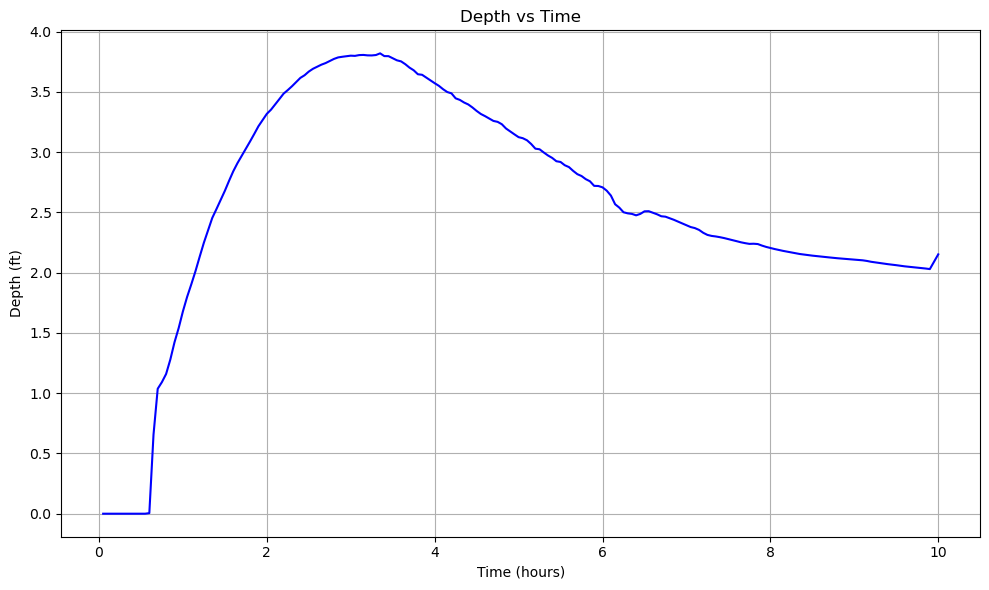

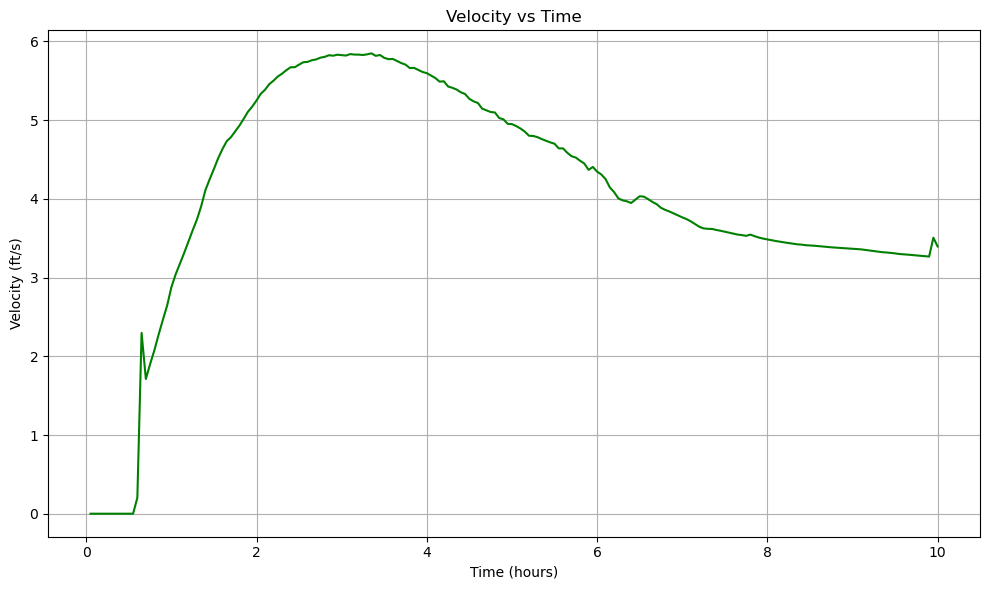

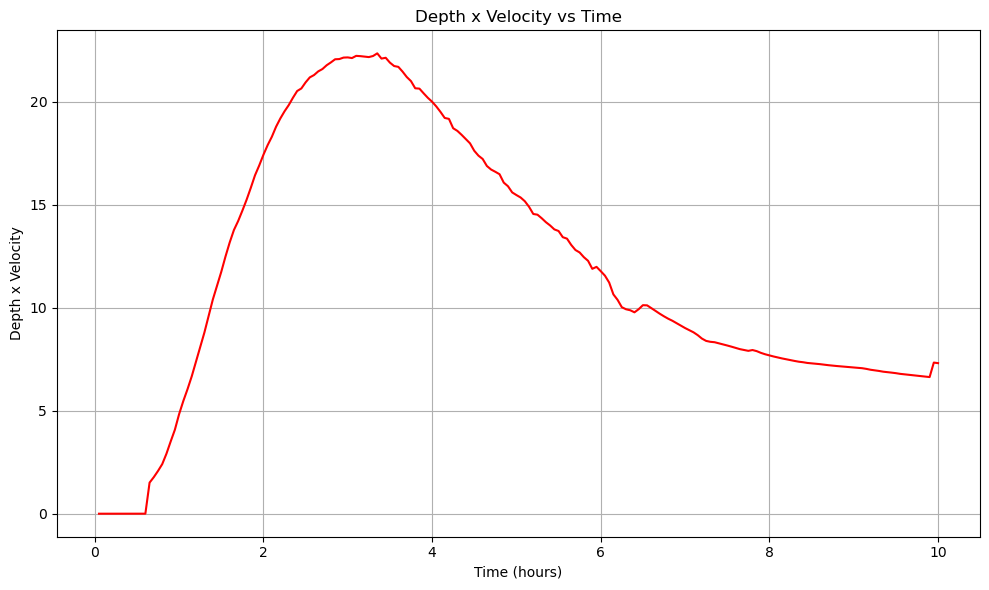

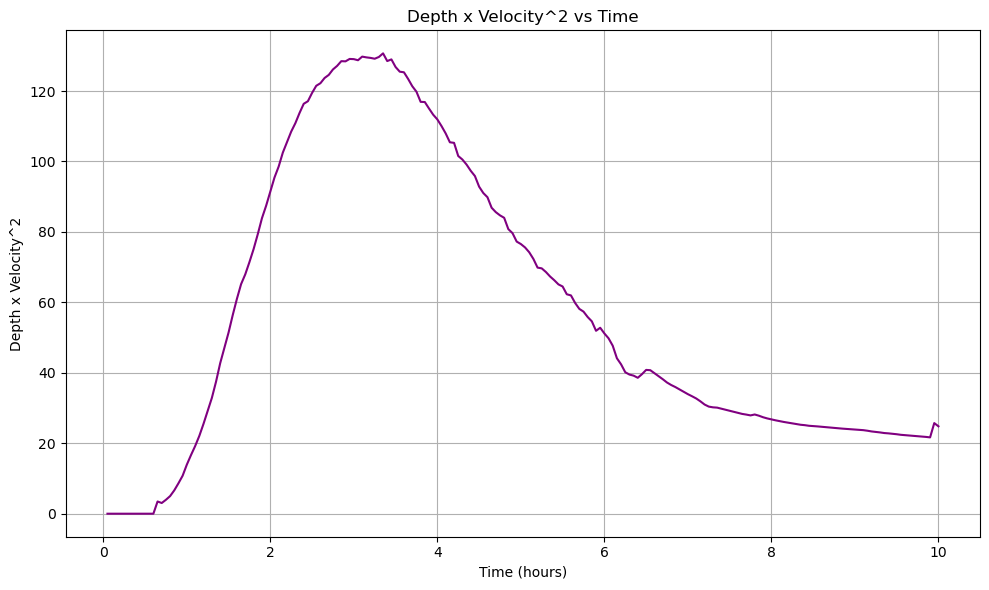

In [28]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Path to the HDF5 file
file_path = r'C:\Users\Karen\Chat GPT Workshop\Data\Hdf5\TIMDEPNC.HDF5'

# Function to plot data with specified color
def plot_data(times, data, title, x_label, y_label, color):
    plt.figure(figsize=(10, 6))
    plt.plot(times, data, color=color)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Open the HDF5 file
with h5py.File(file_path, 'r') as file:
    # Extract data for grid element 5021 (adjust for zero-based indexing in Python)
    grid_index = 5021 - 1
    
    # Load the time data
    times = file['TIMDEP OUTPUT RESULTS/FLOW DEPTH/Times'][:]
    
    # Load the depth data for grid element 5021
    depths = file['TIMDEP OUTPUT RESULTS/FLOW DEPTH/Values'][:, grid_index]
    plot_data(times, depths, 'Depth vs Time', 'Time (hours)', 'Depth (ft)', 'blue')
    
    # Load the velocity data for grid element 5021
    velocities = file['TIMDEP OUTPUT RESULTS/MAX VEL/Values'][:, grid_index]
    plot_data(times, velocities, 'Velocity vs Time', 'Time (hours)', 'Velocity (ft/s)', 'green')
    
    # Load the dep_x_vel data for grid element 5021
    dep_x_vel = file['TIMDEP OUTPUT RESULTS/dep_x_vel'][:, grid_index]
    plot_data(times, dep_x_vel, 'Depth x Velocity vs Time', 'Time (hours)', 'Depth x Velocity', 'red')
    
    # Load the dep_x_sqvel data for grid element 5021
    dep_x_sqvel = file['TIMDEP OUTPUT RESULTS/dep_x_sqvel'][:, grid_index]
    plot_data(times, dep_x_sqvel, 'Depth x Velocity^2 vs Time', 'Time (hours)', 'Depth x Velocity^2', 'purple')
